In [1]:
% Machine Learning and Statistics Project 2019

UsageError: Line magic function `%` not found.


# Machine Learning and Statistics Project 2019

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import keras as kr
import pprint

import statsmodels.api as sm
from scipy.stats import norm

import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from matplotlib import rcParams

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense

from termcolor import colored
import pandas_profiling as pp


# Nicely formatted plots
%matplotlib inline

# Load the Boston housing dataset from sklearn
from sklearn.datasets import load_boston
bhp = load_boston()
prices = bhp.target # Define the target values
features = bhp.data # Define the attribute values

#Store in DataFrame - Easier manipulation
attributes = bhp.feature_names # feature name(s)
data    = pd.DataFrame(features, columns = attributes)
target  = pd.DataFrame(prices, columns =['MEDV'])
boston  = pd.concat([data, target,], axis = 1) #concat data/target


Using TensorFlow backend.


## Explore the Data

***
I explored the dataset using <u>print(bhp)</u> but the output is not exactly easy to interpret. In a real-world situation, offering clients or an employer this output would not be very professional. It can be easy for a person to lose interest or miss important aspects of the output.
***

In [3]:
# Key things to note is data, target, feature_names as I will use these during the project
pprint.pprint(bhp)

{'DESCR': '.. _boston_dataset:\n'
          '\n'
          'Boston house prices dataset\n'
          '---------------------------\n'
          '\n'
          '**Data Set Characteristics:**  \n'
          '\n'
          '    :Number of Instances: 506 \n'
          '\n'
          '    :Number of Attributes: 13 numeric/categorical predictive. '
          'Median Value (attribute 14) is usually the target.\n'
          '\n'
          '    :Attribute Information (in order):\n'
          '        - CRIM     per capita crime rate by town\n'
          '        - ZN       proportion of residential land zoned for lots '
          'over 25,000 sq.ft.\n'
          '        - INDUS    proportion of non-retail business acres per '
          'town\n'
          '        - CHAS     Charles River dummy variable (= 1 if tract '
          'bounds river; 0 otherwise)\n'
          '        - NOX      nitric oxides concentration (parts per 10 '
          'million)\n'
          '        - RM       average num

***
As seen above the output is not readable. In the cell below I have outputted the same contents as above but in a structured and attractive way. It is very easy to understand what the dataset consists of by using <u>.DESCR</u>. I have also outputted the number of houses using <u>data.shape[0]</u> and the number of columns/features using <u>data.shape[1].</u> <i>(range(Y.shape[0])&rdquo;? and Ananthan, 2019)</i>


<i>Key things to note from the data set details below are :</i>
    1. The number of Instances and Attributes. 
    2. The column headings and what each column represents.
    3. Missing values?. I will check for this using a Python command to confirm.
    4. Creators.   
    5. Attribute 14(MEDV) will be the target
***

In [4]:
# Describe the Dataset
print (bhp.DESCR)

print ("---------------------------------------------")
print ("Summary\n")

# Number of houses
houses = data.shape[0]

# Number of features
features = data.shape[1]

print ("Number of Houses          : ", houses)
print ("Number of Housing Features: ", features)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Peek at the data.
***
The code below will output n number of rows from the top. In the below example I have specified 3. If no number is entered it will output 5 rows by default.


In [5]:
# Take a look at the top of the data.
print(colored("Look at the frist three rows of the dataset \n", 'red'))
print(boston.head(3))

Look at the frist three rows of the dataset 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  


***
The line of code below will print n amount of rows from the end. I have not specified and number in the brackets so the default number of five will be used.

In [6]:
print(colored("Look at the last five rows of the dataset \n", 'red'))
print(boston.tail())

Look at the last five rows of the dataset 

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  


### Statistical Summary.
***
The python "describe" method is a great option to use that will display the median, mean, min, max, standard deviations etc. It is a good idea to to create this as it is easy to view and can indicate any unexpected or surprising distributions in the dataset. I have also used 

In [7]:
# Statistical details of each column. How many rows, highest & lowest in each column etc
print(boston.describe())

print("\n \n \n")

print(colored("Check for null values within the dataset \n", "red"))
# Check for any null or missing values, data types etc.
print(boston.info())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Statistical Analysis

By using the NumPy library I am able to calculate a few meaningful statistics about the dataset

In [15]:
# Number of houses
total_houses = data.shape[0]

# Number of features
total_features = data.shape[1]

# Max price
max_price = np.amax(prices)

# Minimum price
min_price = np.min(prices)

# Mean price
mean_price = np.mean(prices)

# Median price
median_price = np.median(prices)

# Standard deviation
std_dev = np.std(prices)

# Calculate and show statistics
print ("House prices in $1000's\n")
print ("Total houses       :", total_houses)
print ("Total features     :", total_features)
print ("Minimum price      : ${:.0f}".format(min_price))
print ("Maximum price      : ${:.0f}".format(max_price))
print ("Mean price         : ${:.2f}".format(mean_price))
print ("Median price       : ${:.2f}".format(median_price))
print ("Standard deviation : ${:.2f}".format(std_dev))

House prices in $1000's

Total houses       : 506
Total features     : 13
Minimum price      : $5
Maximum price      : $50
Mean price         : $22.53
Median price       : $21.20
Standard deviation : $9.19


***
### Histogram

The histogram is very useful when we want to explore our data and give us an understanding of the distribution of the data set. We can set the bin size (by default this is set to 20). It is a good idea to change the bin size as it will output the graph in different ways and might potentially display something that is hidden.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002564C53BA48>


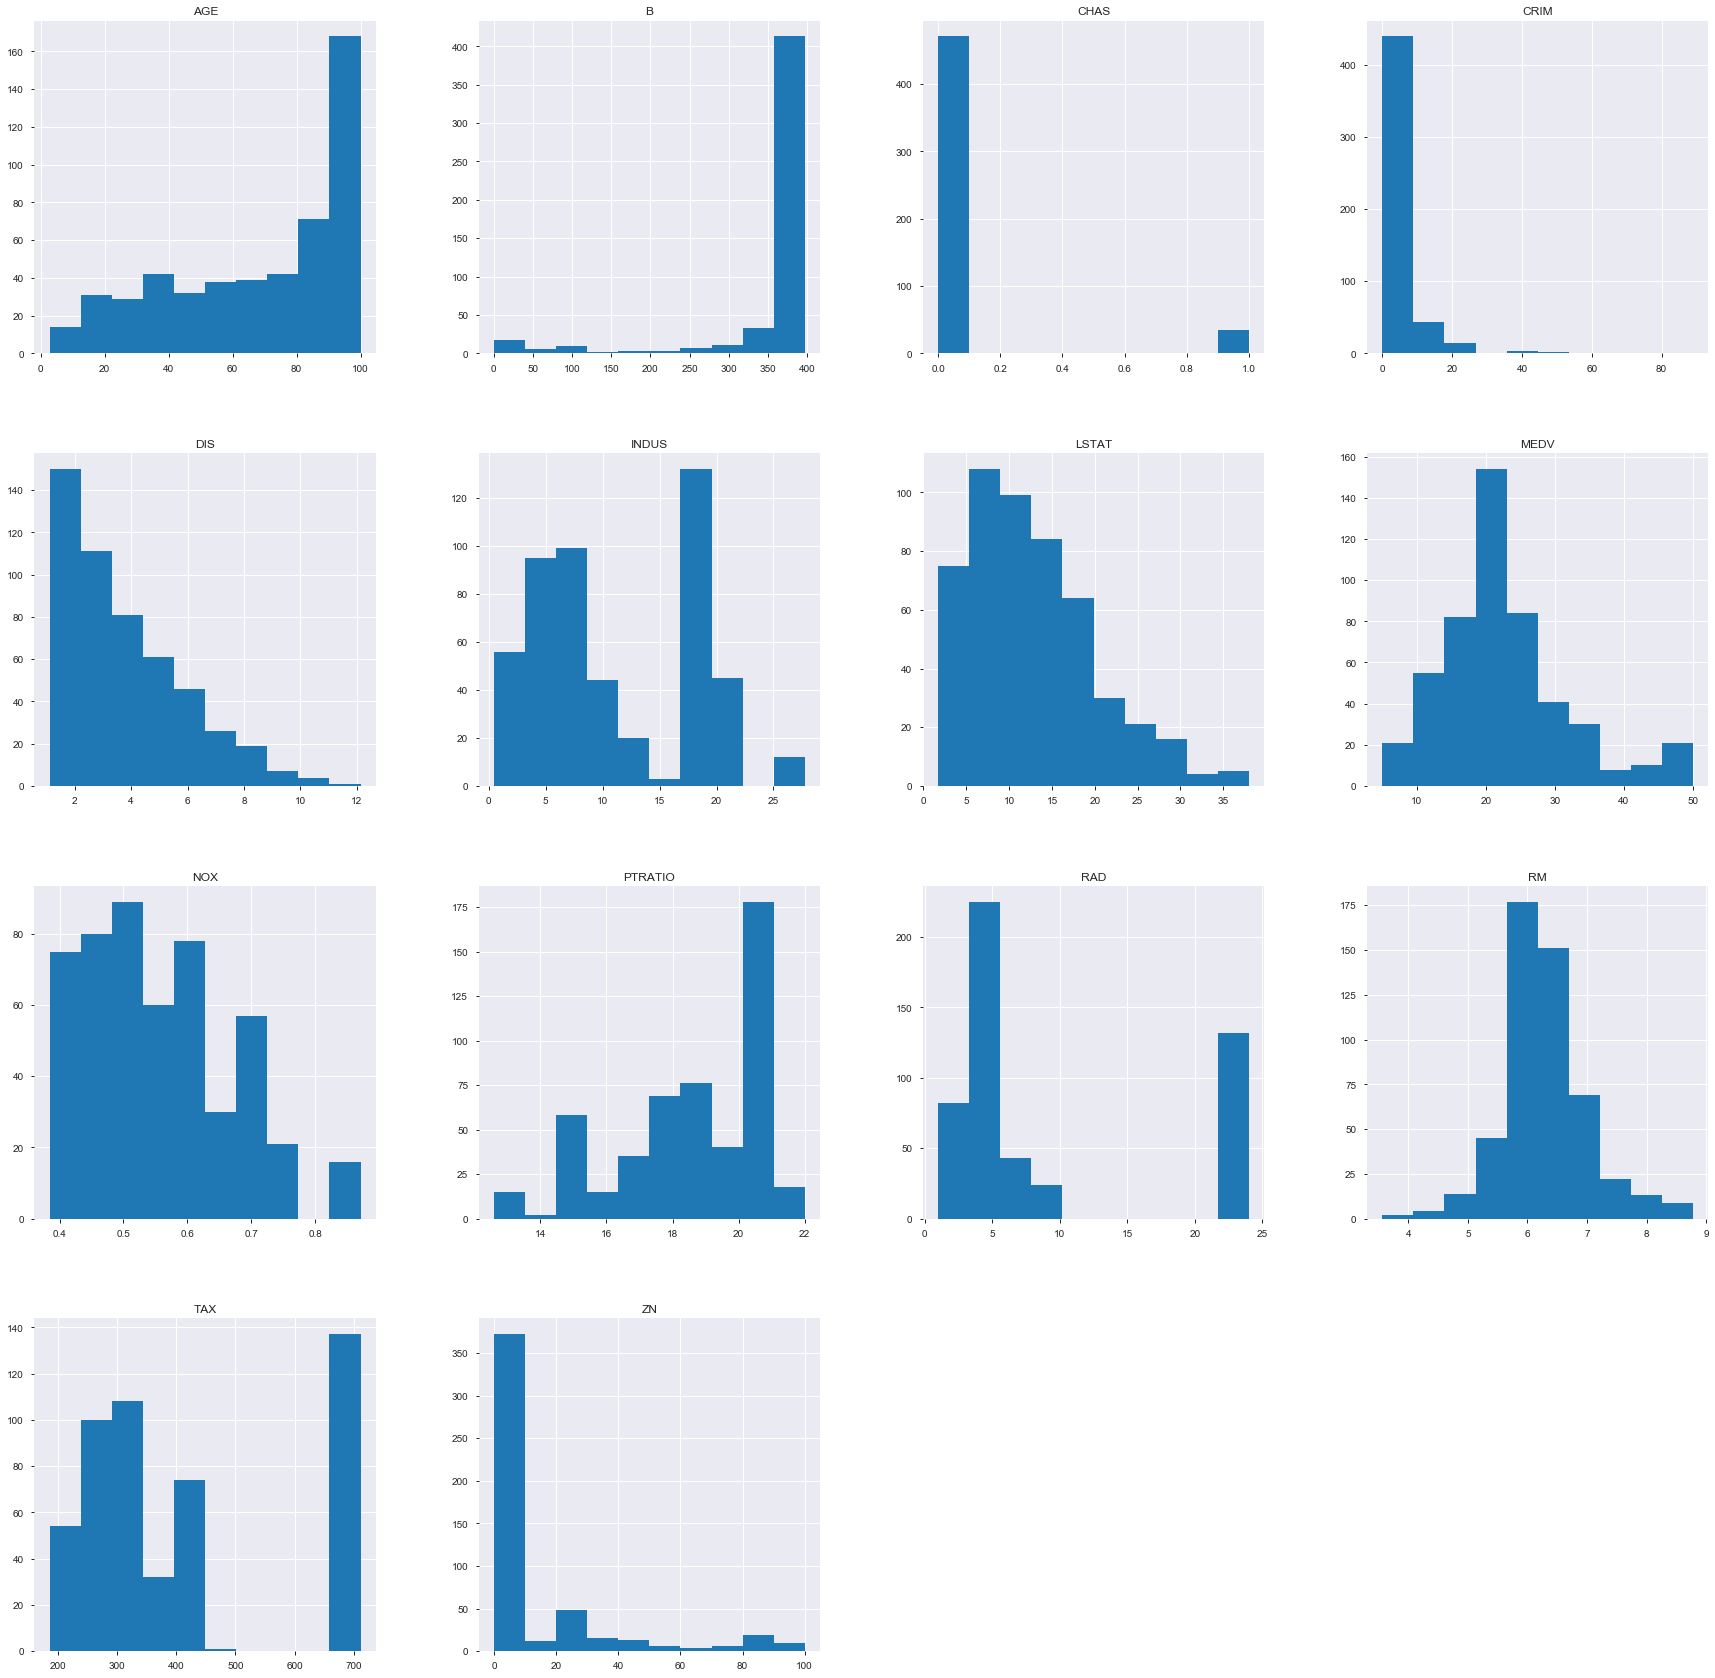

In [41]:
print(boston.hist(bins=10, figsize=(30, 30)))

***
### Heatmap

A heatmap is a very handy tool we can use to view the data in 2-dimensional form. A quick overview of the heatmap indicated that MEDV is strongly correlated to LSTAT

From the correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list. You can find the reason behind this here.

AxesSubplot(0.125,0.125;0.62x0.755)


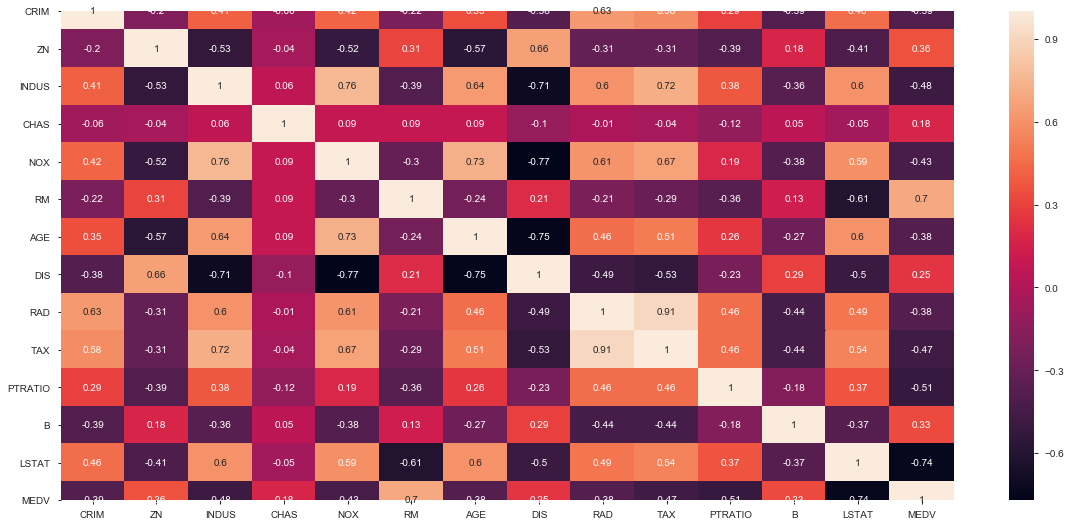

In [35]:
# Generate Heatmap
print(sns.heatmap(boston.corr().round(2), annot=True))

## Profiling Report

<i>For profiling we first need to go to the command line and type <u>"install -c conda-forge pandas-profiling".</u></i>
    
Profiling is a simple and quick way to explore the dataset and is a better than the previous methods such as .describe() and .info() as these offer a very basic overview and with large datasets profiling is a much better option. Pandas Profiling function extends the pandas DataFrame for quick data analysis. It displays a lot of information with a single line of code. This display is very user friendly as it is displayed like a report that interactive. (Medium, 2019)

In [8]:
# Print the profiling report
pp.ProfileReport(boston)

### Find total of houses that are along the Charles river and those that aren’t.

In this section I will analyse whether there is a difference in median house prices between houses that are along the Charles river and those that aren’t. I will use two columns to find the median price, the first column will be CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)) and the second column will be MEDV (Median value of owner-occupied homes in $1000's). I will also use statsmodels.api to output the OLS regression results.

From my findings I can see that the median house price along the river is 23.30 (In 000's) and the median house price not along the river is 20.90 (In 000's).

In [32]:
# Find total of houses that are along the Charles river and those that aren’t.

# Find houses either along the river. ['CHAS']==1] means that they are beside the river
chas1=boston[boston['CHAS']==1]['MEDV']

# Pull columns to generate OLS model
x=boston[boston['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
y=boston[boston['CHAS']==1]['MEDV']


# Find houses either not along the river ['CHAS']==1] means that they are not beside the river
chas0=boston[boston['CHAS']==0]['MEDV'] 

# Pull columns  OLS model
z=boston[boston['CHAS']==0][['RM', 'LSTAT', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
a=boston[boston['CHAS']==0]['MEDV']

#---------------------------------------------------------------------------------------------------------#
# Find the total number of house along the charles river
check1 = (boston.CHAS == 1).sum()

# Find the median of MEDV where CHAS == 1
medianMEDV1 = (boston.loc[boston["CHAS"] == 1]["MEDV"]).median()
print ("Total number of houses along the river is = ",(check1), ", and the median price along the river in $1000's : ${0:.2f}".format(medianMEDV1), "\n")

# OLS Regression for houses beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

# Find the total number of house not along the charles river
check0 = (boston.CHAS != 1).sum()

# find and print the locations where CHAS = 0. Will edit this out for viewing reason 
check = (boston.loc[boston['CHAS'] != 1])
#print("Position numbers of these 0.0 results are : \n",(check.CHAS))

# Find the median of MEDV where CHAS == 0
medianMEDV0 = (boston.loc[boston["CHAS"] != 1]["MEDV"]).median()
print ("\n\n\nTotal number of houses not along the river is = ",(check0), ", and the median price not along the river in $1000's : ${0:.2f}".format(medianMEDV0),"\n")


# OLS Regression for houses not beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(a, z).fit()
predictions = model.predict(z)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

Total number of houses along the river is =  35 , and the median price along the river in $1000's : $23.30 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.663e+28
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:46:08   Log-Likelihood:                 1005.2
No. Observations:                  35   AIC:                            -1992.
Df Residuals:                      26   BIC:                            -1978.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

***
### T Test

The t test is a measurement of whether the average (expected) value will differ significantly across the samples provided. A large p-value (greater than 0.05 or 0.1) then we cannot reject the null hypothesis. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

The result of the ttest I ran is 7.390623170519905e-05 or 0.00007390623170519905(real number). It is clear to see that the p-value is below 1 percent, this implies high significance we can reject the null hypothesis. 

In [33]:
# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.ttest_ind(chas1, chas0))

# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.stats.mannwhitneyu (chas1,chas0))

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)
MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)


***
### Scatter Plot
A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables. This association is called a correlation (Chartio, 2019). Please note the starting points of the scale because it does not start a (0,0).

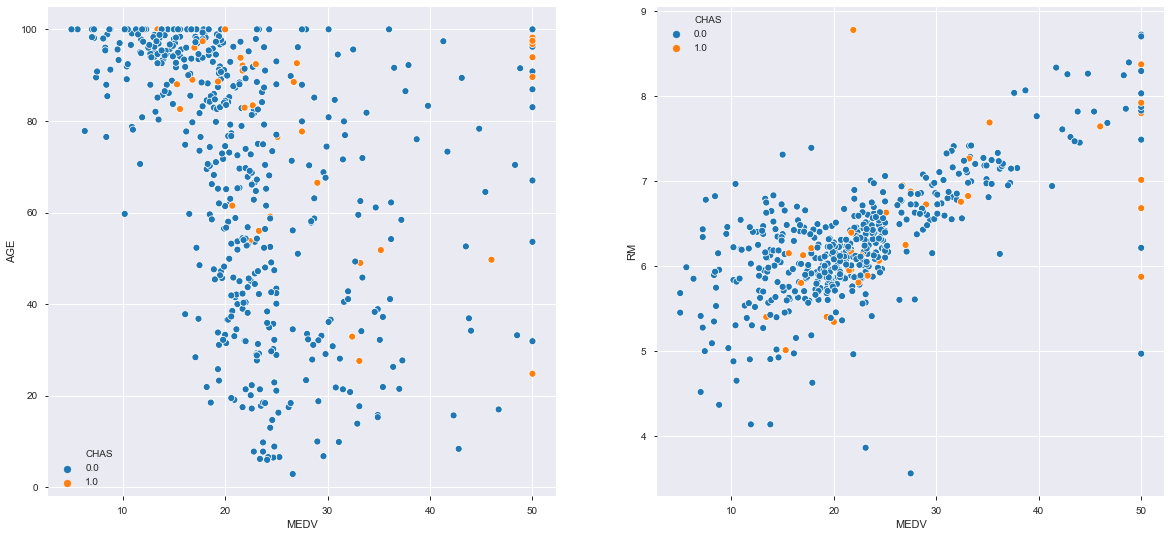

In [30]:
# ScatterPlot
colours = ["blue", "red"] # Define Plot Colours 
f, axes = plt.subplots(1, 2) # Allow me to generate graphs side by side
rcParams['figure.figsize'] = 20,9 # Set display size

# Do houses along and not along the river depend on age
sns.scatterplot(data=boston,x='MEDV',y='AGE', hue='CHAS', ax=axes[0])

# Do houses along and not along the river depend on room size
sns.scatterplot(data=boston,x='MEDV',y='RM', hue='CHAS', ax=axes[1])
plt.show()

***
### Catplot

ADD TEXT

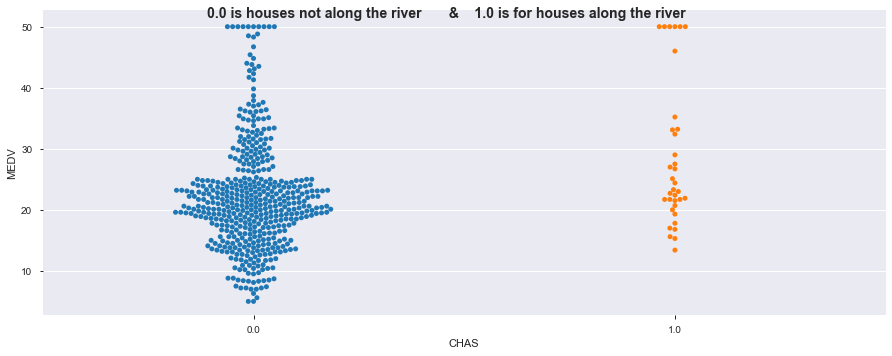

In [31]:
# Lets view the amount of houses that are either beside or not beside the river
colours = ["blue", "red"] # Define Plot Colours 

# Add kind. height and aspect to position accross the page
sns.catplot(x="CHAS", y="MEDV", data=boston, kind="swarm", height=5, aspect=2.5)
suptitle('0.0 is houses not along the river       &    1.0 is for houses along the river', fontsize=14, fontweight='bold')
plt.show()

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables.

Above I have two scatterplots side by side. The first displays AGE along the y axis and MEDV _(Median value of owner-occupied homes in $1000's)_ along the x axis, the HUE that I have used is chas _(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))_. From this I am looking to see if age has any factor where people live or dont live beside the river. We can notice that the age factor with people living beside the river 

***
# Keras

Pandas allow us to use df.corr() to find the pairwise correlation within the dataframe. If any of the values are empty .corr will identify them and automatically excluded them from the output. For any non-numeric data type columns in the dataframe it is ignored.

In [42]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


***

### Split the dataset
The next part of this project I want to train it with the help of Kearas. The most common split ratio is 70:30 which I will implement in this project, if we were using a small datasets a ratio of 90:10 would be sufficient. Training data will be used to train the model while the unseen data is used to validate the model performance. (Singh and scikit-learn, 2019)
    
This is given as a fraction, is used to decides the size of the data that will be split as the test dataset. For example, I have used 0.2 as the value, the dataset will be split 20% as the test dataset.(Medium, 2019)

I have used random_state and I have passed an integer values. This will act as the seed for the random number generator when the spilt occurs. We can however pass an instance of the RandomState class, and in turn this will become the number generator. If we have not used/ passsed anything, RandomState will be used by np.random. (Medium, 2019)

Once the data is split 70:30 I have added a print statement to check if the was successful. The dataset has 506 data points. The output of 354:152 (70:30) is good and what we want to see. 

In [43]:
#X = boston.loc[:, boston.columns != 'MEDV']
#y = boston.loc[:, boston.columns == 'MEDV']

X = boston.iloc[:,0:13] #assign the first 13 columns
y = boston.iloc[:,13]

# split data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# check if the data has split 70 / 30
print(X_train["CRIM"].count())
print(X_test["CRIM"].count())

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

354
152


### Define Model

Below I have created a Keras Sequential model. We can describe a Sequential model as a linear stack of layers. I built the model by passing a list instances to the constructor as shown in the cell below.
<br>

In the cell below we can see that the first layer is called input_shape. We need to specify this first so the model will know what shape to expect on input. 
<br>

Fully connected layers are defined by using the Dense class. Using this class I have specified the number nodes in the layer as the first argument then specify the activation function using the activation argument.<br>

I have used RELU activation function because the performance is much better as opposed to Tanh for example.(Brownlee, 2019)
<br>

We can piece it all together by adding each layer:

* The  model expects rows of data with 13 variables.
    * Represented as the input_dim=13 argument
    
* The first hidden layer has 150 nodes and uses the relu activation function and I have assigned it name='dense_1' for easier viewing on output. 

* The second hidden layer has 75 nodes (Half of layer 1) and uses the relu activation function and I have assigned it name='dense_2' for easier viewing on output. 

* The output layer has one node and I have not specified any activation function so it will use Linear.


In [65]:
# Build our model
# Used (Faroit.com, 2019) to help build the model by passing a list instances to the constructor
model = Sequential([Dense(128, input_dim=(13), activation='relu', name='Dense_1'),
                    Dense(64, activation='relu', name='Dense_2'),
                    Dense(1, name='Dense_Output')])

### Compile Model

Compiling the model uses the TensorFlow numerical library. I have defined the optimizer as the efficient stochastic gradient descent algorithm “adam“. The loss function will be used to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In [66]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
Dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
Dense_Output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


###  Fit Model

Execute the model on the data. To train the model I have called the fit() function. 


ADD DESCRIPTION

In [67]:
# Train our model
history = model.fit(X_train, y_train, epochs=100, 
                    validation_split=0.05)

Train on 336 samples, validate on 18 samples
Epoch 1/100
336/336 [==============================] - 0s 649us/step - loss: 586.2257 - mae: 22.3270 - val_loss: 589.4301 - val_mae: 22.3534
Epoch 2/100
336/336 [==============================] - 0s 39us/step - loss: 521.3294 - mae: 20.8377 - val_loss: 522.9997 - val_mae: 20.8931
Epoch 3/100
336/336 [==============================] - 0s 39us/step - loss: 447.0735 - mae: 18.9572 - val_loss: 437.6167 - val_mae: 18.8709
Epoch 4/100
336/336 [==============================] - 0s 56us/step - loss: 352.3877 - mae: 16.4675 - val_loss: 329.8963 - val_mae: 16.0211
Epoch 5/100
336/336 [==============================] - 0s 39us/step - loss: 242.3821 - mae: 13.3827 - val_loss: 213.0802 - val_mae: 12.5723
Epoch 6/100
336/336 [==============================] - 0s 59us/step - loss: 139.5685 - mae: 9.8298 - val_loss: 118.7666 - val_mae: 9.1387
Epoch 7/100
336/336 [==============================] - 0s 47us/step - loss: 79.0988 - mae: 7.1459 - val_loss: 65.230

In [68]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,loss,mae,epoch
95,12.681754,2.491816,7.301712,1.923516,95
96,12.306028,2.415047,7.217415,1.904618,96
97,12.600544,2.451042,7.203892,1.895582,97
98,12.336472,2.410053,7.250876,1.901504,98
99,13.242394,2.529846,7.082496,1.901068,99


In [69]:
# Needed to install the plotly package - can be done from the command line by entering conda install 
# -c https://conda.anaconda.org/plotly plotly
import plotly.graph_objs as go


fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [70]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

###  Evaluate Model

ADD DESCRIPTION


In [71]:
# Evaluate our model
mse_nn, mae_nn= model.evaluate(X_test, y_test)

sum_price = y_train.sum()+y_test.sum()
sum_houses= y_train.size+y_test.size # 506 columns in the CSV file

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

print("")

print("Average of prices of all the data = ",sum_price/sum_houses)

152/152 [==============================] - 0s 40us/step
Mean squared error on test data:  19.484372088783665
Mean absolute error on test data:  2.7713499069213867

Average of prices of all the data =  22.532806324110673


The average house price is of 22.53 (in thousands) while the mean absolute error on test is 2.7 which is not bad

In [72]:
# And now with a Decision Tree:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)

print('Mean squared error on test data: ', mse_dt)
print('Mean absolute error on test data: ', mae_dt)

Mean squared error on test data:  21.332894736842107
Mean absolute error on test data:  3.031578947368421


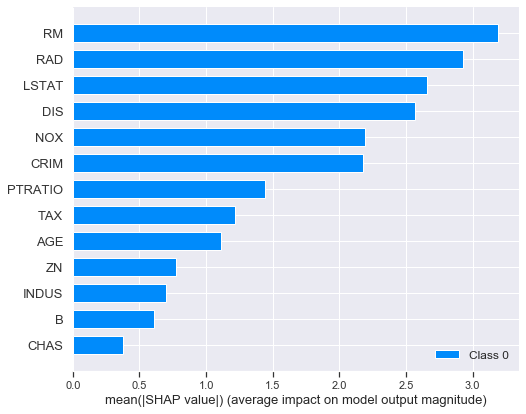

In [74]:
#  conda install shapely

# WHAT VERSION OF TENSOR FLOW????????? ETC

import shap as shap

import tensorflow as tf
tf.compat.v1.keras.backend.get_session


shap.initjs()

explainer = shap.DeepExplainer(model, X_train[:100].values)
shap_values = explainer.shap_values(X_test[:100].values)

shap.summary_plot(shap_values, X_test, plot_type='bar')

